In [ ]:
import pandas as pd

# 1. Load data 
df = pd.read_csv("womens_health_econ.csv")

# Quick check of columns
print(df.columns)

# 2. Maternal mortality summary 

mmr_1985_mean = df["1985"].mean()
mmr_2020_mean = df["2020"].mean()
drop_pct = (mmr_1985_mean - mmr_2020_mean) / mmr_1985_mean * 100

mmr_2020_desc = df["2020"].describe(percentiles=[0.25, 0.5, 0.75])

print("Maternal Mortality (per 100,000 live births)")
print(f"  Mean MMR in 1985: {mmr_1985_mean:.1f}")
print(f"  Mean MMR in 2020: {mmr_2020_mean:.1f}")
print(f"  Percent drop 1985 → 2020: {drop_pct:.1f}%\n")

print("  2020 MMR distribution:")
print(f"    Min: {mmr_2020_desc['min']:.1f}")
print(f"    25th percentile: {mmr_2020_desc['25%']:.1f}")
print(f"    Median: {mmr_2020_desc['50%']:.1f}")
print(f"    75th percentile: {mmr_2020_desc['75%']:.1f}")
print(f"    Max: {mmr_2020_desc['max']:.1f}\n")

# 3. Contraceptive prevalence

contr_mean = df["contraceptive_prevalence_pct"].mean()
contr_min = df["contraceptive_prevalence_pct"].min()
contr_max = df["contraceptive_prevalence_pct"].max()

print("Contraceptive prevalence (% of women using any method)")
print(f"  Mean: {contr_mean:.1f}%")
print(f"  Range: {contr_min:.1f}% – {contr_max:.1f}%\n")

# 4. GDP per capita 

gdp_mean = df["gdp_per_capita_usd"].mean()
gdp_min = df["gdp_per_capita_usd"].min()
gdp_max = df["gdp_per_capita_usd"].max()

print("GDP per capita (USD)")
print(f"  Mean: ${gdp_mean:,.0f}")
print(f"  Range: ${gdp_min:,.0f} – ${gdp_max:,.0f}\n")

# 5. Associations / correlations 

corr_mmr_gdp = df["2020"].corr(df["gdp_per_capita_usd"])
corr_mmr_contr = df["2020"].corr(df["contraceptive_prevalence_pct"])

print("Correlations with 2020 MMR")
print(f"  Corr(MMR_2020, GDP per capita): {corr_mmr_gdp:.2f}")
print(f"  Corr(MMR_2020, contraceptive prevalence): {corr_mmr_contr:.2f}\n")

# 6. Extremes 

top5_mmr = df.nlargest(5, "2020")[["country", "2020", "contraceptive_prevalence_pct"]]
bottom5_mmr = df.nsmallest(5, "2020")[["country", "2020", "contraceptive_prevalence_pct"]]

print("Highest 2020 MMR (worst 5):")
for _, row in top5_mmr.iterrows():
    print(f"  {row['country']}: {row['2020']:.1f} deaths/100k, "
          f"contraceptive prevalence {row['contraceptive_prevalence_pct']:.1f}%")

print("\nLowest 2020 MMR (best 5):")
for _, row in bottom5_mmr.iterrows():
    print(f"  {row['country']}: {row['2020']:.1f} deaths/100k, "
          f"contraceptive prevalence {row['contraceptive_prevalence_pct']:.1f}%")



Index(['country', '2020', '2010', '2000', '1985',
       'contraceptive_prevalence_pct', 'gdp_per_capita_usd', 'region'],
      dtype='object')
Maternal Mortality (per 100,000 live births)
  Mean MMR in 1985: 450.1
  Mean MMR in 2020: 171.6
  Percent drop 1985 → 2020: 61.9%

  2020 MMR distribution:
    Min: 1.1
    25th percentile: 22.5
    Median: 77.1
    75th percentile: 225.1
    Max: 1222.5

Contraceptive prevalence (% of women using any method)
  Mean: 48.0%
  Range: 4.0% – 88.0%

GDP per capita (USD)
  Mean: $11,093
  Range: $154 – $107,316

Correlations with 2020 MMR
  Corr(MMR_2020, GDP per capita): -0.36
  Corr(MMR_2020, contraceptive prevalence): -0.67

Highest 2020 MMR (worst 5):
  South Sudan: 1222.5 deaths/100k, contraceptive prevalence 4.0%
  Chad: 1063.5 deaths/100k, contraceptive prevalence 5.0%
  Nigeria: 1047.2 deaths/100k, contraceptive prevalence 15.0%
  Central African Republic: 835.3 deaths/100k, contraceptive prevalence 15.0%
  Guinea-Bissau: 725.1 deaths/100k,

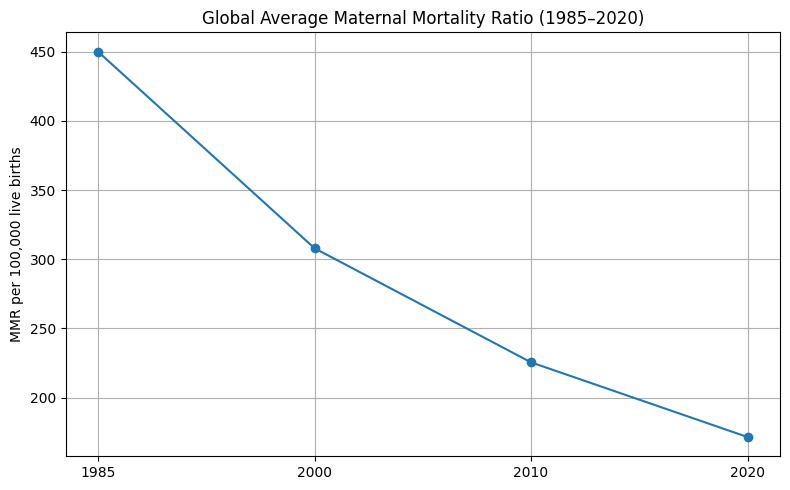

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("womens_health_econ.csv")

years = ["1985", "2000", "2010", "2020"]
mmr_means = df[years].mean()

plt.figure(figsize=(8,5))
plt.plot(years, mmr_means, marker="o")
plt.title("Global Average Maternal Mortality Ratio (1985–2020)")
plt.ylabel("MMR per 100,000 live births")
plt.grid(True)
plt.tight_layout()
plt.show()

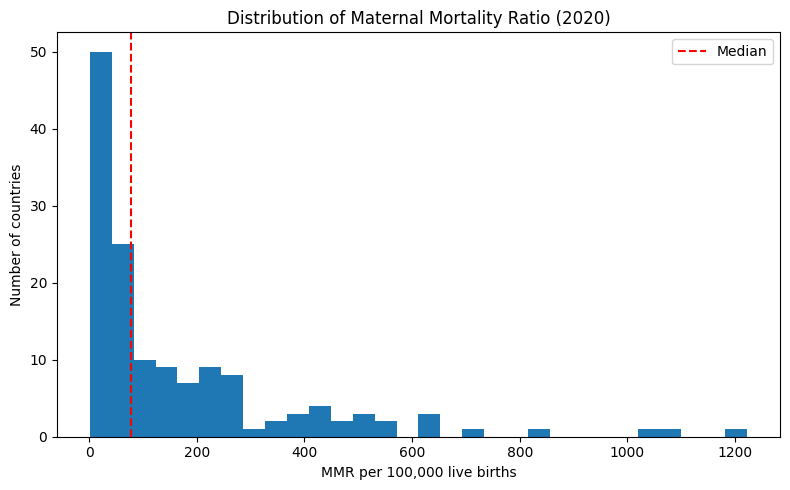

In [3]:
plt.figure(figsize=(8,5))
plt.hist(df["2020"], bins=30)
plt.title("Distribution of Maternal Mortality Ratio (2020)")
plt.xlabel("MMR per 100,000 live births")
plt.ylabel("Number of countries")
plt.axvline(df["2020"].median(), color="red", linestyle="--", label="Median")
plt.legend()
plt.tight_layout()
plt.show()

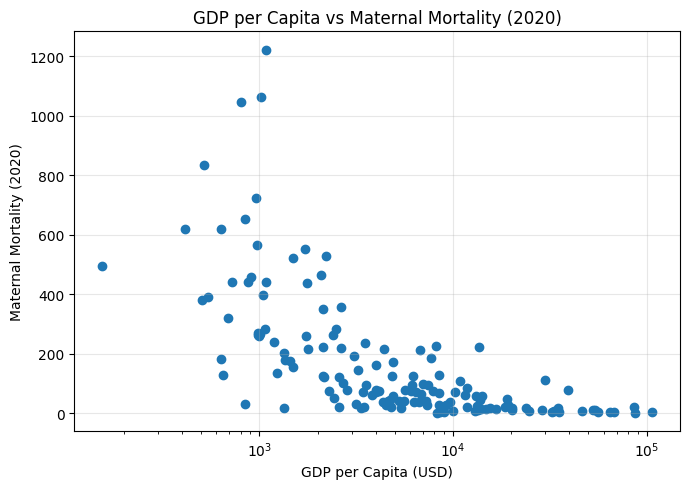

In [4]:
plt.figure(figsize=(7,5))
plt.scatter(df["gdp_per_capita_usd"], df["2020"])
plt.title("GDP per Capita vs Maternal Mortality (2020)")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Maternal Mortality (2020)")
plt.xscale("log")   # GDP varies massively; log scale shows structure
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


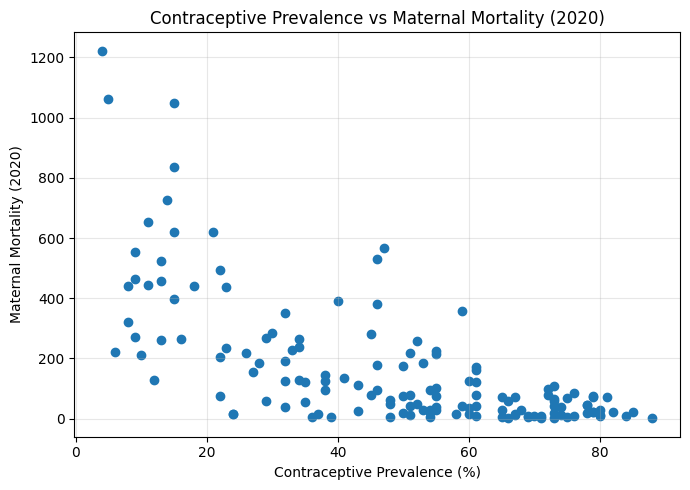

In [5]:
plt.figure(figsize=(7,5))
plt.scatter(df["contraceptive_prevalence_pct"], df["2020"])
plt.title("Contraceptive Prevalence vs Maternal Mortality (2020)")
plt.xlabel("Contraceptive Prevalence (%)")
plt.ylabel("Maternal Mortality (2020)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


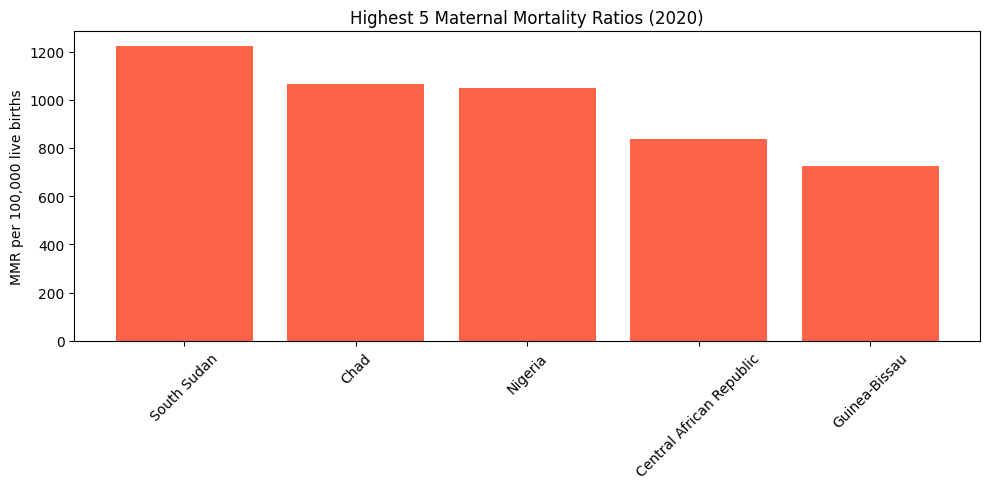

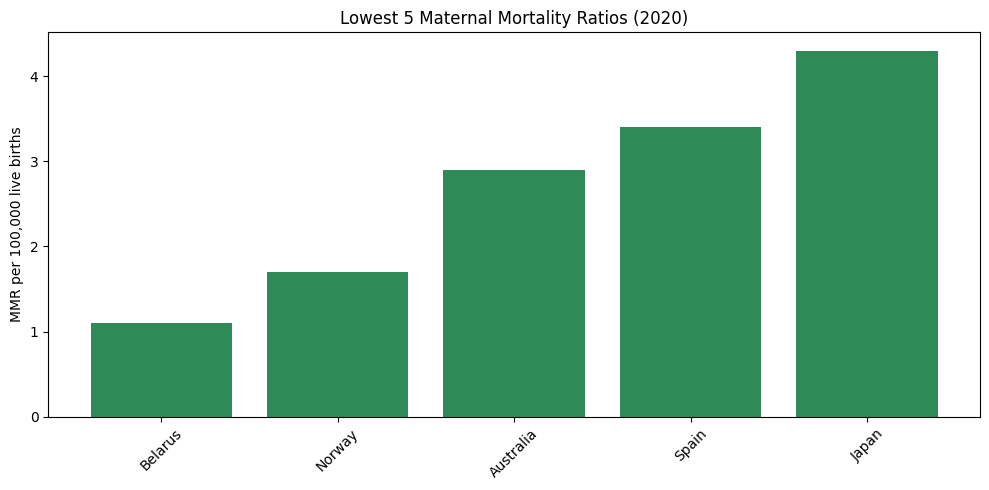

In [6]:
top5 = df.nlargest(5, "2020")
bottom5 = df.nsmallest(5, "2020")

plt.figure(figsize=(10,5))

plt.bar(top5["country"], top5["2020"], color="tomato")
plt.title("Highest 5 Maternal Mortality Ratios (2020)")
plt.ylabel("MMR per 100,000 live births")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.bar(bottom5["country"], bottom5["2020"], color="seagreen")
plt.title("Lowest 5 Maternal Mortality Ratios (2020)")
plt.ylabel("MMR per 100,000 live births")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
